In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import io, signal, stats
import sys, os
sys.path.append('../')

from nlds.data_utils import load_mouse_data, sim_lorenz
from nlds.plotting import plot_trajectory
from nlds.edm_wrap import iterPredDim
import nlds.delayembed as de
import pyEDM as edm
import pandas as pd

In [4]:
datafolder = '/Users/rdgao/Documents/data/Stringer_neuropixel/spikes/'
mice = ['Krebs', 'Waksman', 'Robbins']
i_m = 0
spiketimes, df_info = load_mouse_data(datafolder, i_m, return_type='spiketimes', bin_width=1)
log_isi = [np.log10(np.diff(st)) for st in spiketimes]
isi = [np.diff(st) for st in spiketimes]

Grabbing Spikes...


/Users/rdgao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


In [33]:
tau=2
maxdim=12
Tps = np.arange(1,11)

num_points = np.zeros(len(isi))
for i_c, isi_ in enumerate(isi):
    print(i_c, end='|')
    x = isi_[:1000]
    num_points[i_c] = len(x)
    if len(x)<200:
        continue
    else:
        df_data = pd.DataFrame(np.array([np.arange(0, len(x)).astype(int), x]).T, columns=['Time','X'])
        split_ind = int(len(x)/2)

        lib_inds = '0 %s'%split_ind
        pred_inds = '%s %s'%(split_ind, len(x)-tau*maxdim)
        df_corr = iterPredDim(df_data,lib_inds,pred_inds, Tps, maxdim=maxdim, tau=tau)
        df_corr.to_csv('../results/isi_embed/%s/%s_tau-%i.csv'%(mice[i_m],i_c,tau))


0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|31|32|33|34|35|36|37|38|39|40|41|42|43|44|45|46|47|48|49|50|51|52|53|54|55|56|57|58|59|60|61|62|63|64|65|66|67|68|69|70|71|72|73|74|75|76|77|78|79|80|81|82|83|84|85|86|87|88|89|90|91|92|93|94|95|96|97|98|99|100|101|102|103|104|105|106|107|108|109|110|111|112|113|114|115|116|117|118|119|120|121|122|123|124|125|126|127|128|129|130|131|132|133|134|135|136|137|138|139|140|141|142|143|144|145|146|147|148|149|150|151|152|153|154|155|156|157|158|159|160|161|162|163|164|165|166|167|168|169|170|171|172|173|174|175|176|177|178|179|180|181|182|183|184|185|186|187|188|189|190|191|192|193|194|195|196|197|198|199|200|201|202|203|204|205|206|207|208|209|210|211|212|213|214|215|216|217|218|219|220|221|222|223|224|225|226|227|228|229|230|231|232|233|234|235|236|237|238|239|240|241|242|243|244|245|246|247|248|249|250|251|252|253|254|255|256|257|258|259|260|261|262|263|264|265|266|267|268|269|270|271|272|273|274|275|276|27

In [32]:
isi_

array([139.65342185,  95.28186318,   3.21328977, 162.6935818 ,
        16.15414855,  34.57498987,  87.95481985,  17.47371101,
         2.07029341,  86.08122582,  58.78124611,   4.64245188,
        11.35963048, 107.78692335, 168.86479548,  11.16303111,
         3.82532115,  12.78932593,  18.48550779,  34.00665835,
        51.51530258,  11.8998621 ,   8.61563922,   2.63615827,
        17.69604364,  27.6712452 ,  73.70496524,   1.2860959 ])

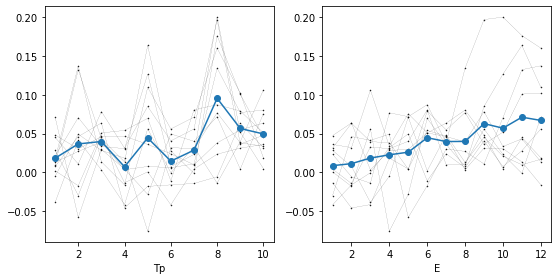

In [25]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(df_corr,'.-k', lw=0.1, ms=1)
plt.plot(df_corr.mean(1),'o-')
plt.xlabel('Tp')

plt.subplot(1,2,2)
plt.plot(df_corr.T,'.-k', lw=0.1, ms=1)
plt.plot(df_corr.mean(0),'o-')
plt.xlabel('E')
plt.tight_layout()

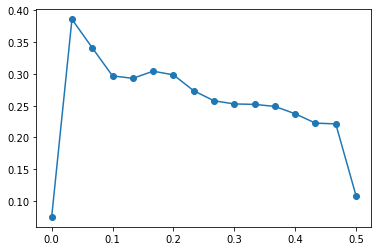

In [66]:
faxis, psd = signal.welch(isi[600], nperseg=30, noverlap=20)
plt.plot(faxis, psd, 'o-')

In [ ]:
# .mat's are ~ 80, 330, and 300 mb respectively
datafolder = '/Users/rdgao/Documents/data/Stringer_neuropixel/spikes/'
krebs = io.loadmat(datafolder+'spks/spksKrebs_Feb18.mat', squeeze_me = True)
# robbins = io.loadmat(datafolder+'spks/spksRobbins_Feb18.mat', squeeze_me = True)  
# waksman = io.loadmat(datafolder+'spks/spksWaksman_Feb18.mat', squeeze_me = True)

In [ ]:
probelocs = io.loadmat(datafolder+'probeLocations.mat', squeeze_me = True)
probelocs

In [ ]:
isi = np.log10(np.diff(krebs_spks[4][1][:5000]))
print(len(isi))
max_dim = 15
n_bins = 20
max_tau = 20

t_MI, MI = de.compute_delay_MI(isi, n_bins, max_tau)
v_ind, v_val = de.find_valley(MI)
embed_dim, pfnn = de.PFNN(isi, 1, max_dim)

print(embed_dim)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(t_MI, MI, 'o-')
plt.plot(v_ind, v_val, 'o')
plt.subplot(1,2,2)
plt.plot(range(1,max_dim+1), pfnn, 'o-')
plt.yscale('log')
plt.tight_layout()

In [ ]:
delay = 5
isi = np.log10(np.diff(krebs_spks[2][3][:5000]))
plt.plot(isi[:-delay], isi[delay:], '.-', ms=0.1, lw=0.1)
print(len(isi))
df_isi = pd.DataFrame(np.array([np.arange(1, len(isi)+1).astype(int), isi]).T, columns=['Time','ISI'])
#df_isi
edm.EmbedDimension(dataFrame = df_isi, lib = "1 2000", pred = "2000 2500", columns="ISI", target="ISI", tau=delay)

In [ ]:
edm.Examples()
#edm.sampleData['TentMap']